Ocetrac metrics 11/20

In [1]:
import dask
import pandas as pd
import xarray as xr
import numpy as np
import dask.array as da
import warnings
warnings.filterwarnings('ignore')
from datetime import date
import math
#plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#sns.set_theme(style="white")

print('loaded libraries')

loaded libraries


In [2]:
#load data
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
mt_path = "/pub/mariant3/WarmWaterMasses/data/"
manso = pd.read_pickle(f"{mt_path}ocetracv6/ocetrac-v6-processed/ocetrac-v6-blobs-tos-t1-df-r1-msq0-0186-03-15-0189-12-14.pkl")
#manso = pd.read_pickle(f"{mt_path}/data_ocetrac-labels/01860503-01901020_mhw-metrics-global.pkl")
labels = xr.open_dataset(f"{mt_path}ocetracv6/ocetrac-v6-processed/ocetrac-v6-blobs-tos-t1-r1-msq0-01860315-01891214-manso.nc", chunks={'time':1}).blobs.load()

In [3]:
manso

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area
0,39,[0186-03-28],"[([8.22163897284192], [-76.49719618069989])]",NaN,1,[29.017515],[29.017515],[29.017515],29.017515,[758747800.0]
1,136,[0186-03-28],"[([12.889873669635012, 12.889873669635012, 12....",NaN,1,[29.120079],[29.059717],[29.00637],494.015198,[12490594000.0]
2,210,"[0186-04-07, 0186-04-08, 0186-04-09, 0186-04-1...","[([14.589726512825457, 14.831531473953534, 14....",NaN,5,"[29.035416, 29.163082, 29.19532, 29.234726, 29...","[29.018019, 29.080574, 29.096212, 29.118254, 2...","[29.00061, 29.016766, 29.01853, 29.001623, 29....",2094.147949,"[4341889000.0, 12295158000.0, 13025446000.0, 1..."
3,220,[0186-04-08],"[([15.073066511750687], [-97.32987229325035])]",NaN,1,[29.005522],[29.005522],[29.005522],29.005522,[722297700.0]
4,224,"[0186-04-09, 0186-04-10]","[([14.105322883430246, 14.105322883430246, 14....",NaN,2,"[29.043283, 29.04856]","[29.021551, 29.016363]","[29.010565, 29.000925]",348.227478,"[4367308300.0, 4370401300.0]"
...,...,...,...,...,...,...,...,...,...,...
1121,7570,[0189-11-12],"[([9.210078121568138], [-80.04971042048845])]",NaN,1,[29.008205],[29.008205],[29.008205],29.008205,[754758900.0]
1122,7605,[0189-11-16],"[([9.456768240176679], [-75.48265376058285])]",NaN,1,[29.01919],[29.01919],[29.01919],29.019190,[753695000.0]
1123,7608,"[0189-11-17, 0189-11-18, 0189-11-19, 0189-11-2...","[([8.71618532806131], [-76.49719618069989]), (...",NaN,6,"[29.106436, 29.262722, 29.13803, 29.187286, 29...","[29.106436, 29.166527, 29.13803, 29.187286, 29...","[29.106436, 29.070333, 29.13803, 29.187286, 29...",233.095856,"[756807040.0, 1512603400.0, 756807040.0, 75680..."
1124,7626,"[0189-11-20, 0189-11-21, 0189-11-22, 0189-11-2...","[([9.456768240176679], [-75.48265376058285]), ...",NaN,10,"[29.058964, 29.159037, 29.1661, 29.14241, 29.1...","[29.058964, 29.159037, 29.1661, 29.14241, 29.1...","[29.058964, 29.159037, 29.1661, 29.14241, 29.1...",291.308441,"[753695000.0, 753695000.0, 753695000.0, 753695..."


In [30]:
for index in manso.index:
    print(f'index: {index}, id:{manso["id"][index]}, duration: {manso["duration"][index]},dates: {manso["date"][index]}')

index: 0, id:39, duration: 1,dates: ['0186-03-28']
index: 1, id:136, duration: 1,dates: ['0186-03-28']
index: 2, id:210, duration: 5,dates: ['0186-04-07' '0186-04-08' '0186-04-09' '0186-04-10' '0186-04-11']
index: 3, id:220, duration: 1,dates: ['0186-04-08']
index: 4, id:224, duration: 2,dates: ['0186-04-09' '0186-04-10']
index: 5, id:225, duration: 1,dates: ['0186-04-09']
index: 6, id:252, duration: 78,dates: ['0186-04-12' '0186-04-13' '0186-04-14' '0186-04-15' '0186-04-16'
 '0186-04-17' '0186-04-18' '0186-04-19' '0186-04-20' '0186-04-21'
 '0186-04-22' '0186-04-23' '0186-04-24' '0186-04-25' '0186-04-26'
 '0186-04-27' '0186-04-28' '0186-04-29' '0186-04-30' '0186-05-01'
 '0186-05-02' '0186-05-03' '0186-05-04' '0186-05-05' '0186-05-06'
 '0186-05-07' '0186-05-08' '0186-05-09' '0186-05-10' '0186-05-11'
 '0186-05-12' '0186-05-13' '0186-05-14' '0186-05-15' '0186-05-16'
 '0186-05-17' '0186-05-18' '0186-05-19' '0186-05-20' '0186-05-21'
 '0186-05-22' '0186-05-23' '0186-05-24' '0186-05-25' '0186

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

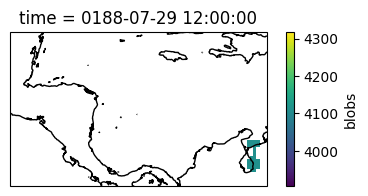

In [50]:
fig = plt.figure(figsize=(5,2))
ax = plt.axes(projection=ccrs.PlateCarree())

labels.where(labels == 4112, drop=True).isel(time=100).plot(ax=ax,transform=ccrs.PlateCarree())

ax.coastlines()

ax.set_xlim(-90,-70)
ax.set_ylim(8,20)

plt.show()

In [4]:
area_list_manso = [event_area.sum() for event_area in manso.area.values]
area_list = [event_area.sum() for event_area in manso.area.values]
intensity_list_manso = [(event_maxint.max()-29) for event_maxint in manso.intensity_max.values]
manso['max_intensity_max'] = intensity_list_manso
manso['cumulative_area']= area_list

In [5]:
manso

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area,max_intensity_max,cumulative_area
0,39,[0186-03-28],"[([8.22163897284192], [-76.49719618069989])]",NaN,1,[29.017515],[29.017515],[29.017515],29.017515,[758747800.0],0.017515,7.587478e+08
1,136,[0186-03-28],"[([12.889873669635012, 12.889873669635012, 12....",NaN,1,[29.120079],[29.059717],[29.00637],494.015198,[12490594000.0],0.120079,1.249059e+10
2,210,"[0186-04-07, 0186-04-08, 0186-04-09, 0186-04-1...","[([14.589726512825457, 14.831531473953534, 14....",NaN,5,"[29.035416, 29.163082, 29.19532, 29.234726, 29...","[29.018019, 29.080574, 29.096212, 29.118254, 2...","[29.00061, 29.016766, 29.01853, 29.001623, 29....",2094.147949,"[4341889000.0, 12295158000.0, 13025446000.0, 1...",0.234726,5.205649e+10
3,220,[0186-04-08],"[([15.073066511750687], [-97.32987229325035])]",NaN,1,[29.005522],[29.005522],[29.005522],29.005522,[722297700.0],0.005522,7.222977e+08
4,224,"[0186-04-09, 0186-04-10]","[([14.105322883430246, 14.105322883430246, 14....",NaN,2,"[29.043283, 29.04856]","[29.021551, 29.016363]","[29.010565, 29.000925]",348.227478,"[4367308300.0, 4370401300.0]",0.048559,8.737710e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1121,7570,[0189-11-12],"[([9.210078121568138], [-80.04971042048845])]",NaN,1,[29.008205],[29.008205],[29.008205],29.008205,[754758900.0],0.008205,7.547589e+08
1122,7605,[0189-11-16],"[([9.456768240176679], [-75.48265376058285])]",NaN,1,[29.01919],[29.01919],[29.01919],29.019190,[753695000.0],0.019190,7.536950e+08
1123,7608,"[0189-11-17, 0189-11-18, 0189-11-19, 0189-11-2...","[([8.71618532806131], [-76.49719618069989]), (...",NaN,6,"[29.106436, 29.262722, 29.13803, 29.187286, 29...","[29.106436, 29.166527, 29.13803, 29.187286, 29...","[29.106436, 29.070333, 29.13803, 29.187286, 29...",233.095856,"[756807040.0, 1512603400.0, 756807040.0, 75680...",0.262722,6.053446e+09
1124,7626,"[0189-11-20, 0189-11-21, 0189-11-22, 0189-11-2...","[([9.456768240176679], [-75.48265376058285]), ...",NaN,10,"[29.058964, 29.159037, 29.1661, 29.14241, 29.1...","[29.058964, 29.159037, 29.1661, 29.14241, 29.1...","[29.058964, 29.159037, 29.1661, 29.14241, 29.1...",291.308441,"[753695000.0, 753695000.0, 753695000.0, 753695...",0.203808,7.536949e+09


In [ ]:
# ids = np.unique(labels)
# ids = np.array([id for id in ids if ~np.isnan(id)])
# one_day_ids = df[df['duration'] == 1]['id'].tolist()
# # Remove ids from the original labels array
# ids = np.array([id for id in ids if id not in one_day_ids])

In [49]:
# Identify the IDs of rows where duration is 1
# ids_to_drop = manso[manso['duration'] == 1]['id'].tolist()
# new_manso = manso[manso['duration'] != 1]

new_manso = manso[manso['duration'] >= 3]
new_manso = new_manso.reset_index(drop=True)

In [50]:
area_list_new_manso = [event_area.sum() for event_area in new_manso.area.values]
area_list_new_manso = [event_area.sum() for event_area in new_manso.area.values]
intensity_list_new_manso = [(event_maxint.max()-29) for event_maxint in new_manso.intensity_max.values]
new_manso['max_intensity_max'] = intensity_list_new_manso
new_manso['cumulative_area']= area_list_new_manso

In [51]:
new_manso= new_manso.reset_index(drop=True)
new_manso

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area,max_intensity_max,cumulative_area
0,210,"[0186-04-07, 0186-04-08, 0186-04-09, 0186-04-1...","[([14.589726512825457, 14.831531473953534, 14....",NaN,5,"[29.035416, 29.163082, 29.19532, 29.234726, 29...","[29.018019, 29.080574, 29.096212, 29.118254, 2...","[29.00061, 29.016766, 29.01853, 29.001623, 29....",2.094148e+03,"[4341889000.0, 12295158000.0, 13025446000.0, 1...",0.234726,5.205649e+10
1,252,"[0186-04-12, 0186-04-13, 0186-04-14, 0186-04-1...","[([16.51638681427514, 16.51638681427514], [-10...",NaN,78,"[29.025343, 29.118113, 29.15337, 29.241293, 29...","[29.022104, 29.059237, 29.074001, 29.078295, 2...","[29.018866, 29.001, 29.026066, 29.000034, 29.0...",1.158360e+06,"[1424190500.0, 10727039000.0, 12856191000.0, 3...",1.681967,2.890037e+13
2,321,"[0186-04-25, 0186-04-26, 0186-04-27, 0186-04-2...","[([8.22163897284192], [-76.49719618069989]), (...",NaN,14,"[29.032696, 29.021748, 29.111485, 29.251947, 2...","[29.032696, 29.021748, 29.111485, 29.251947, 2...","[29.032696, 29.021748, 29.111485, 29.251947, 2...",6.739615e+02,"[758747800.0, 758747800.0, 758747800.0, 758747...",0.776340,1.744259e+10
3,329,"[0186-04-23, 0186-04-24, 0186-04-25]","[([9.456768240176679], [-71.42674774213911]), ...",NaN,3,"[29.082546, 29.108322, 29.000256]","[29.082546, 29.108322, 29.000256]","[29.082546, 29.108322, 29.000256]",8.719112e+01,"[753695000.0, 753695000.0, 753695000.0]",0.108322,2.261085e+09
4,354,"[0186-05-02, 0186-05-03, 0186-05-04, 0186-05-05]","[([8.22163897284192, 8.22163897284192], [-85.1...",NaN,4,"[29.065676, 29.114294, 29.156002, 29.17877]","[29.051628, 29.082169, 29.087471, 29.107056]","[29.037579, 29.050724, 29.004023, 29.03407]",5.527061e+02,"[1517495600.0, 3034991000.0, 4552486400.0, 531...",0.178770,1.441621e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
490,7530,"[0189-10-31, 0189-11-01, 0189-11-02, 0189-11-0...","[([21.943045533438184], [-106.22998737768873])...",NaN,7,"[29.004158, 29.109081, 29.13769, 29.150887, 29...","[29.004158, 29.065287, 29.102575, 29.088331, 2...","[29.004158, 29.000631, 29.028858, 29.0028, 29....",9.594843e+02,"[666592300.0, 3337258800.0, 3337258800.0, 4003...",0.150887,2.202984e+10
491,7532,"[0189-11-01, 0189-11-02, 0189-11-03]","[([18.89774041753039, 18.89774041753039, 19.13...",NaN,3,"[29.016195, 29.059645, 29.00504]","[29.011452, 29.036127, 29.00504]","[29.004002, 29.005512, 29.00504]",2.612200e+02,"[2078449900.0, 3469289700.0, 693472000.0]",0.059645,6.241211e+09
492,7608,"[0189-11-17, 0189-11-18, 0189-11-19, 0189-11-2...","[([8.71618532806131], [-76.49719618069989]), (...",NaN,6,"[29.106436, 29.262722, 29.13803, 29.187286, 29...","[29.106436, 29.166527, 29.13803, 29.187286, 29...","[29.106436, 29.070333, 29.13803, 29.187286, 29...",2.330959e+02,"[756807040.0, 1512603400.0, 756807040.0, 75680...",0.262722,6.053446e+09
493,7626,"[0189-11-20, 0189-11-21, 0189-11-22, 0189-11-2...","[([9.456768240176679], [-75.48265376058285]), ...",NaN,10,"[29.058964, 29.159037, 29.1661, 29.14241, 29.1...","[29.058964, 29.159037, 29.1661, 29.14241, 29.1...","[29.058964, 29.159037, 29.1661, 29.14241, 29.1...",2.913084e+02,"[753695000.0, 753695000.0, 753695000.0, 753695...",0.203808,7.536949e+09


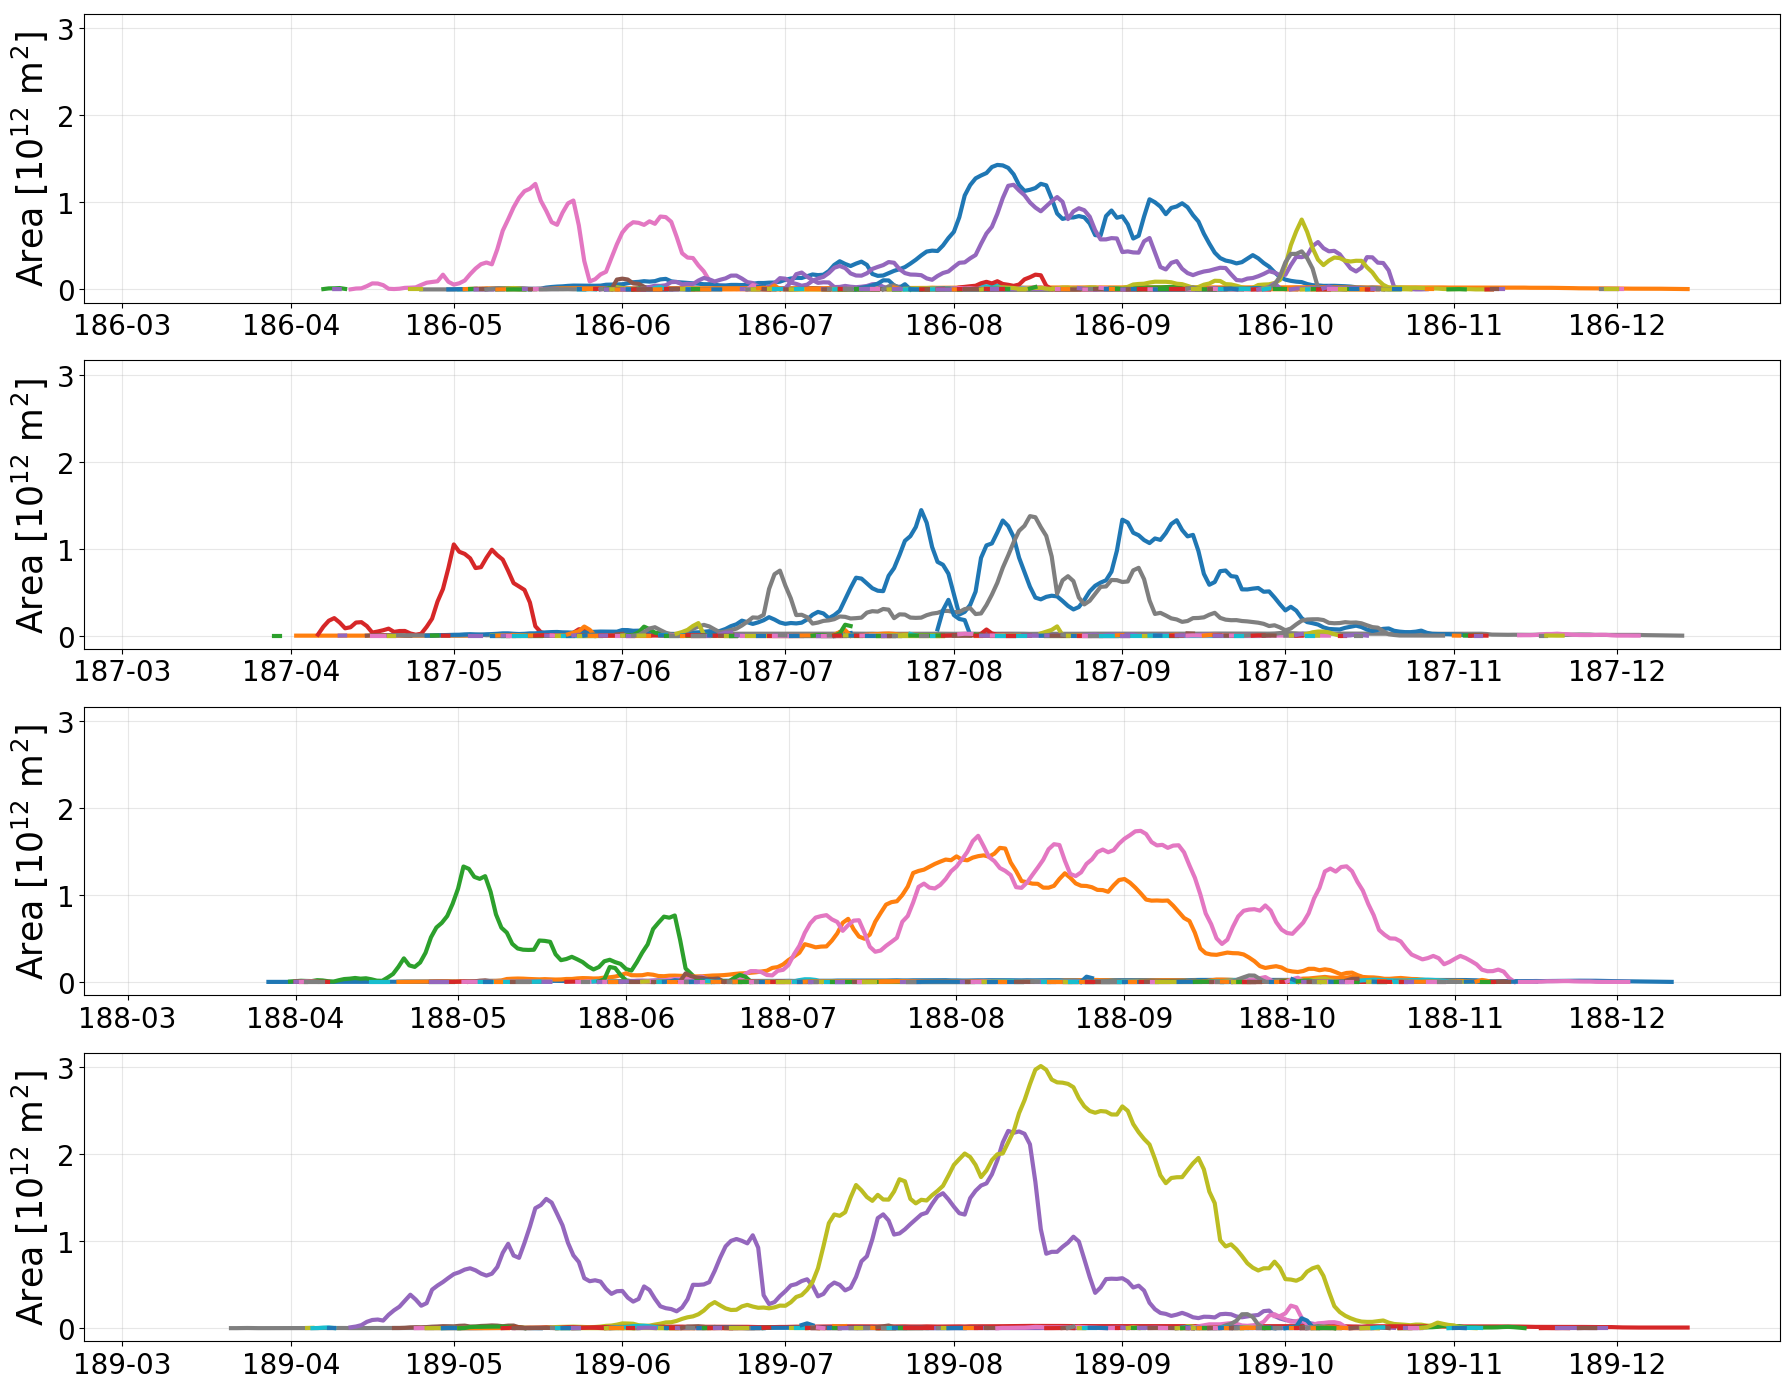

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fontsize = 20
years = ['0186', '0187', '0188', '0189']  # Years to plot

fig, axs = plt.subplots(len(years), 1, figsize=(18, 3.5 * len(years)))  # Adjusting height based on number of subplots fig, axs = plt.subplots(len(years), 1, figsize=(18, 3.5 * len(years)))  
#fig.set_facecolor('#faf8eb')

for i, year in enumerate(years):
    year_start = f'{year}-02-22'
    year_end = f'{year}-12-31'
    
    for j in range(len(manso['area'].values)):
        axs[i].plot(manso.date[j], manso.area[j], label=f'MHW {manso.id[j]}', linewidth=3)
    
    axs[i].set_xlim(np.datetime64(year_start), np.datetime64(year_end)) #year_start
   # axs[i].set_ylim(0e+12, 3.20e+12)
    axs[i].set_ylabel(r"Area [10$^{12}$ m${^2}$]", fontsize=25)
    axs[i].tick_params(axis='x', labelsize=fontsize)
    axs[i].tick_params(axis='y', labelsize=fontsize)
    #axs[i].set_yticks(np.arange(0e+12, 3.20e+12 + 0.3e+12, 0.3e+12))
    axs[i].grid(True, alpha=0.3)
    
    #axs[i].set_title(f'Year {year}', fontsize=20)

    offset_text = axs[i].yaxis.get_offset_text()
    offset_text.set_fontsize(1)
    offset_text.set_color('w')

plt.tight_layout()
#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/area-evolution-paper.png', bbox_inches='tight')
#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/paper/ocetrac-v5-area-evolution-t1.png', bbox_inches='tight')
plt.show()

In [40]:
range(len(new_manso['area'].values))

range(0, 732)

In [84]:
# #quick-fix for are displayed in duration-intensity-area plot
area = [25000000094208,50000000188416,75000002379776,100000000376832,124999998373888]
area_rounded = ["{:.1e}".format(a) for a in area]

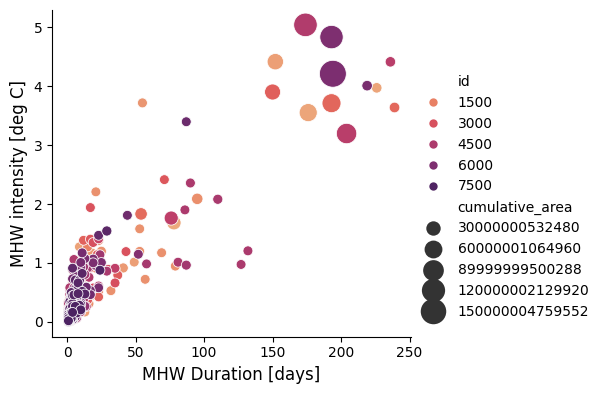

In [6]:
area = [25000000094208,50000000188416,75000002379776,100000000376832,124999998373888]
area_rounded = ["{:.1e}".format(a) for a in area]

ax = sns.relplot(
    data=manso, x="duration", y="max_intensity_max",
    size="cumulative_area",hue="id", sizes=(50,375),height=4,aspect=1.1, #200,3000
    palette='flare')
    
# for label in ax.legend.texts:
#     label.set_fontsize(12)
#     if label.get_text() == "id":
#         label.set_text(r"MHW Label")
#     if label.get_text() == "cumulative_area":
#         label.set_text(r"Area $\mathrm{{m^2}}$")
#     if label.get_text() == f"{area[0]}":
#         label.set_text(f'{area_rounded[0]}')
#     if label.get_text() == f"{area[1]}":
#         label.set_text(f'{area_rounded[1]}')
#     if label.get_text() == f"{area[2]}":
#         label.set_text(f'{area_rounded[2]}')
#     if label.get_text() == f"{area[3]}":
#         label.set_text(f'{area_rounded[3]}')
#     if label.get_text() == f"{area[4]}":
#         label.set_text(f'{area_rounded[4]}')
        
# for text in ax.ax.xaxis.get_ticklabels():
#     text.set_fontsize(12)
# for text in ax.ax.yaxis.get_ticklabels():
#     text.set_fontsize(12)

#ax.legend.set_bbox_to_anchor((0.91, 0.56)) #1.2

ax.fig.set_facecolor('w')#faf8eb
ax.set_axis_labels('MHW Duration [days]', 'MHW intensity [deg C]', fontsize=12)
ax.ax.set_facecolor('w')

#ax.savefig(f'/pub/mariant3/WarmWaterMasses/figures/paper/ocetrac-v5-dia-t1.png',dpi=300, bbox_inches='tight')